In [1]:
import numpy
from sklearn import svm
from sklearn import metrics
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt

In [2]:
xTrain = numpy.load("xtrain_lenspop.npy") #replace with your own training
yTrain = numpy.load("ytrain_lenspop.npy")

xTest = numpy.load("xtrain_lenspop.npy") #replace with your own testing
yTest = numpy.load("ytrain_lenspop.npy")

xTrain = [y.flatten() for y in x_lens]
xTest = [y.flatten() for y in x_lens]

In [44]:
#this'll take so long omg
clf = svm.SVC(probability = True)
clf.fit(xTrain, yTrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [45]:
correct = [1 if x == y else 0 for x, y in zip(yTest, clf.predict(xTest))]
print sum(correct) / float(len(correct))

0.497666666667


In [46]:
fpr, tpr, thresholds = metrics.roc_curve(numpy.asarray(yTest), clf.predict_proba(xTest).transpose()[1], pos_label=1)
metrics.auc(fpr, tpr)

0.5

In [20]:
rf = RandomForestClassifier(max_depth = 10, n_estimators=100)
rf.fit(xTrain, yTrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [28]:
correct = [1 if x == y else 0 for x, y in zip(yTest, rf.predict(xTest))]
print sum(correct) / float(len(correct)) #accuracy

0.933


In [40]:
fpr, tpr, thresholds = metrics.roc_curve(numpy.asarray(yTest), rf.predict_proba(xTest).transpose()[1], pos_label=1)
metrics.auc(fpr, tpr)

0.99056201668391886

In [21]:
rf_feature_importances = rf.feature_importances_
reshaped_feature_importances = numpy.reshape(rf_feature_importances, (3, 64, 64))

In [22]:
scale = 255.9/max(rf_feature_importances) #scaling tree

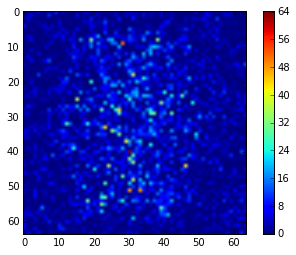

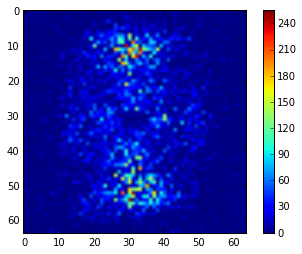

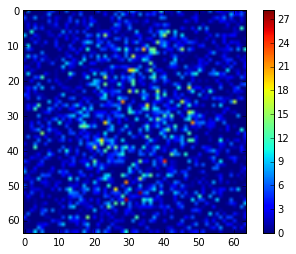

In [26]:
#visualizing each channel of the importances for pixels in the random forest
%matplotlib inline

plt.imshow(reshaped_feature_importances[0]*scale)
plt.colorbar()
plt.show()
plt.imshow(reshaped_feature_importances[1]*scale)
plt.colorbar()
plt.show()
plt.imshow(reshaped_feature_importances[2]*scale)
plt.colorbar()
plt.show()

In [27]:
correct = [1 if x == y else 0 for x, y in zip(yTest, rf.predict(xTest))]
print sum(correct) / float(len(correct))

0.863333333333


In [4]:
log = linear_model.LogisticRegression()
log.fit(xTrain, yTrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [5]:
correct = [1 if x == y else 0 for x, y in zip(yTest, log.predict(xTest))]
print sum(correct) / float(len(correct))

0.944


In [47]:
fpr, tpr, thresholds = metrics.roc_curve(numpy.asarray(yTest), log.predict_proba(xTest).transpose()[1], pos_label=1)
metrics.auc(fpr, tpr)

0.98785173543779392

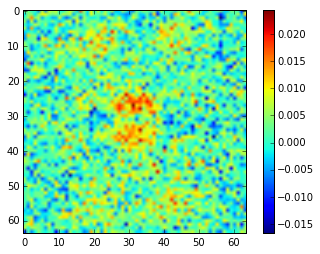

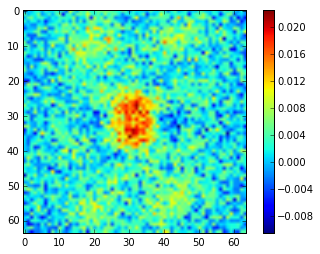

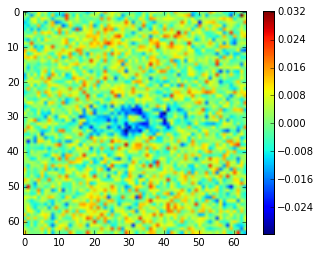

In [27]:
#visualization each channel of the logistic regression weights
%matplotlib inline
log_reg_weights= log.coef_

log_reg_weights.shape

log_reg_weights = log_reg_weights.reshape((3, 64, 64))

plt.imshow(log_reg_weights[0])
plt.colorbar()
plt.show()
plt.imshow(log_reg_weights[1])
plt.colorbar()
plt.show()
plt.imshow(log_reg_weights[2])
plt.colorbar()
plt.show()